In [ ]:
#import libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow.python import keras
from tensorflow.python.keras.utils.np_utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt
import datetime
import keras
from keras.models import Sequential
from tensorflow.keras import layers 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K




In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Unzip file and store in csv
import gzip


with gzip.open('/content/drive/MyDrive/Colab Notebooks/CS6/all_train.csv.gz', 'rt', newline='') as csv_file:
    csv_data = csv_file.read()
    with open('/content/drive/MyDrive/Colab Notebooks/CS6/all_train.csv', 'wt') as out_file:
         out_file.write(csv_data)

In [ ]:
 #Load up data and show.
 df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS6/all_train.csv')
 df.head()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


In [ ]:
#Rename labels column 
df2=df
df2.rename(columns = {'# label':'detection'}, inplace = True)
df2.head()

,detection,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


In [ ]:
#Display a summary of variables
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 29 columns):
 #   Column     Dtype  
---  ------     -----  
 0   detection  float64
 1   f0         float64
 2   f1         float64
 3   f2         float64
 4   f3         float64
 5   f4         float64
 6   f5         float64
 7   f6         float64
 8   f7         float64
 9   f8         float64
 10  f9         float64
 11  f10        float64
 12  f11        float64
 13  f12        float64
 14  f13        float64
 15  f14        float64
 16  f15        float64
 17  f16        float64
 18  f17        float64
 19  f18        float64
 20  f19        float64
 21  f20        float64
 22  f21        float64
 23  f22        float64
 24  f23        float64
 25  f24        float64
 26  f25        float64
 27  f26        float64
 28  mass       float64
dtypes: float64(29)
memory usage: 1.5 GB


In [ ]:
#Summary of Attributes in the dataframe
df2.describe()

,detection,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,...,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,5.001256e-01,1.612528e-02,4.770022e-04,2.686578e-05,1.056081e-02,-1.050026e-04,2.765919e-03,1.815953e-02,2.510948e-05,4.345870e-04,...,1.164789e-02,-1.127097e-04,7.686731e-05,2.909202e-04,1.228774e-02,9.778378e-03,5.269844e-03,-1.760961e-03,1.533136e-02,1.000107e+03
std,5.000000e-01,1.004417e+00,9.974864e-01,1.000080e+00,9.956003e-01,9.998670e-01,1.000957e+00,9.867746e-01,9.965867e-01,1.000007e+00,...,1.002725e+00,1.000038e+00,1.000033e+00,1.000170e+00,1.010477e+00,1.005418e+00,1.009990e+00,9.844511e-01,9.822799e-01,3.534255e+02
min,0.000000e+00,-1.960549e+00,-2.365355e+00,-1.732165e+00,-9.980274e+00,-1.732137e+00,-1.054221e+00,-3.034787e+00,-2.757853e+00,-1.732359e+00,...,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.631608e+00,-4.729473e+00,-2.062223e+01,-3.452634e+00,-2.632761e+00,5.000000e+02
25%,0.000000e+00,-7.288206e-01,-7.332548e-01,-8.656704e-01,-6.092291e-01,-8.658025e-01,-1.054221e+00,-7.566092e-01,-7.014146e-01,-8.656543e-01,...,-7.423630e-01,-7.206846e-01,-8.656855e-01,-5.736825e-01,-5.417942e-01,-5.115522e-01,-3.543870e-01,-6.925097e-01,-7.943804e-01,7.500000e+02
50%,1.000000e+00,-3.930319e-02,8.523957e-04,3.199154e-04,1.963316e-02,-5.070131e-04,-5.983562e-03,-1.499527e-01,-1.067553e-04,1.384781e-03,...,-8.992496e-02,-6.735953e-05,-4.424527e-04,-5.736825e-01,-1.602760e-01,-3.144032e-01,-3.265228e-01,-3.570301e-01,-8.828640e-02,1.000000e+03
75%,1.000000e+00,6.900799e-01,7.347832e-01,8.659464e-01,6.798818e-01,8.657646e-01,8.504885e-01,7.686690e-01,7.013194e-01,8.665976e-01,...,6.423185e-01,7.204921e-01,8.659566e-01,-5.736825e-01,4.812194e-01,1.634892e-01,-2.337671e-01,4.753128e-01,7.610846e-01,1.250000e+03
max,1.000000e+00,4.378282e+00,2.365287e+00,1.732370e+00,4.148023e+00,1.731978e+00,4.482618e+00,3.720345e+00,2.758590e+00,1.731450e+00,...,5.866367e+00,2.282217e+00,1.732740e+00,1.743123e+00,7.293420e+00,9.333287e+00,1.499064e+01,5.277313e+00,4.444690e+00,1.500000e+03


In [ ]:
#Replace all '0.0' with '0' and '1.0' with '1' in the "# labels" column.
df2['detection'] = df2['detection'].map({0.0: 0, 1.0: 1})
df2.head()

,detection,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 29 columns):
 #   Column     Dtype  
---  ------     -----  
 0   detection  int64  
 1   f0         float64
 2   f1         float64
 3   f2         float64
 4   f3         float64
 5   f4         float64
 6   f5         float64
 7   f6         float64
 8   f7         float64
 9   f8         float64
 10  f9         float64
 11  f10        float64
 12  f11        float64
 13  f12        float64
 14  f13        float64
 15  f14        float64
 16  f15        float64
 17  f16        float64
 18  f17        float64
 19  f18        float64
 20  f19        float64
 21  f20        float64
 22  f21        float64
 23  f22        float64
 24  f23        float64
 25  f24        float64
 26  f25        float64
 27  f26        float64
 28  mass       float64
dtypes: float64(28), int64(1)
memory usage: 1.5 GB


In [ ]:
#see if there are nulls
df2.isnull().sum()

detection    0
f0           0
f1           0
f2           0
f3           0
f4           0
f5           0
f6           0
f7           0
f8           0
f9           0
f10          0
f11          0
f12          0
f13          0
f14          0
f15          0
f16          0
f17          0
f18          0
f19          0
f20          0
f21          0
f22          0
f23          0
f24          0
f25          0
f26          0
mass         0
dtype: int64

In [ ]:
#Count values in label
df2['detection'].value_counts()

1    3500879
0    3499121
Name: detection, dtype: int64

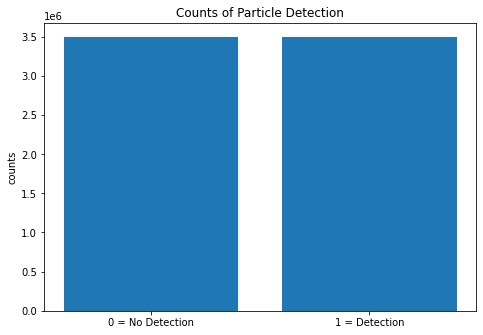

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ["0 = No Detection", "1 = Detection"]
ax.bar(labels,df2["detection"].value_counts())
plt.ylabel("counts")
plt.title('Counts of Particle Detection')
plt.show()

In [ ]:
#Examine the mean of the Numerical Values by detection
df2.groupby(['detection']).mean()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
detection,,,,,,,,,,,,,,,,,,,,,
0,-0.298406,-0.000002,0.000218,-0.354269,-0.000008,-0.167244,-0.622133,-0.000461,0.000343,-0.004206,...,-0.314664,-0.000166,-0.000086,0.014460,-0.120530,-0.259394,-0.112234,-0.380659,-0.559919,1000.176824
1,0.330499,0.000955,-0.000164,0.375208,-0.000202,0.172690,0.658131,0.000511,0.000526,-0.009532,...,0.337796,-0.000059,0.000240,-0.013871,0.145039,0.278815,0.122714,0.376947,0.590293,1000.037984


In [ ]:
#Examine the mean of the numerical values by mass
df2.groupby('mass')['detection'].value_counts()

mass         detection
499.999969   1            699365
             0            698251
750.000000   0            700782
             1            700156
1000.000000  1            701440
             0            700475
1250.000000  1            700418
             0            699467
1500.000000  0            700146
             1            699500
Name: detection, dtype: int64

In [ ]:
import seaborn as sns

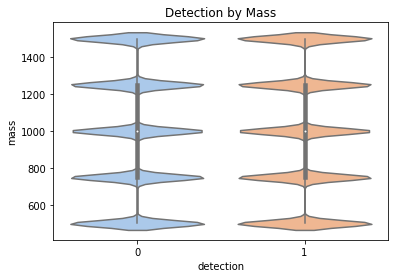

In [ ]:
#Create a Violinplot of Detection and Mass
import seaborn as sns
sns.set_palette("pastel")
sns.violinplot(x='detection',y='mass', data = df2)
plt.title('Detection by Mass')
plt.show()

In [ ]:
#Potential attribute with all factors 
sns.pairplot(df2, kind="scatter", hue = "detection", markers = ["o", "s"], palette = "Set2")
plt.show()

In [ ]:
now = datetime.datetime.now

batch_size = 128
num_classes = 10
epochs = 30
# number of convolutional filters to use
filters = 32
# size of pooling area for max pooling
pool_size = 2
# convolution kernel size
kernel_size = 3

In [ ]:
x = df2.loc[:,df2.columns !='detection']
y = df2['detection']  

In [ ]:
# Range of 0,1 is important for well trained neural networks
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(x)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[27], scaler.min_[27]))
multiplied_by = scaler.scale_[27]
added = scaler.min_[27]

scaled_train_df = pd.DataFrame(scaled_train, columns=x.columns.values)

Note: median values were scaled by multiplying by 0.0010000000 and adding -0.500000


In [ ]:
%matplotlib inline

for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.title(i)
    plt.show()

In [ ]:
# Split into test/train 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.3,random_state=444)

In [ ]:
# Create the model and build layers
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,)))
model.add(layers.Dense(50,activation='relu'))  

In [ ]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['mean_squared_error','accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_test,y_test), batch_size=128)

Epoch 1/30
38282/38282 [==============================] - 134s 3ms/step - loss: 0.4122 - mean_squared_error: 4.8057 - accuracy: 0.8225 - val_loss: 0.3700 - val_mean_squared_error: 5.9283 - val_accuracy: 0.8352
Epoch 2/30
38282/38282 [==============================] - 136s 4ms/step - loss: 0.3679 - mean_squared_error: 6.3504 - accuracy: 0.8357 - val_loss: 0.3672 - val_mean_squared_error: 6.6898 - val_accuracy: 0.8352
Epoch 3/30
38282/38282 [==============================] - 124s 3ms/step - loss: 0.3665 - mean_squared_error: 6.9347 - accuracy: 0.8363 - val_loss: 0.3665 - val_mean_squared_error: 7.1502 - val_accuracy: 0.8364
Epoch 4/30
38282/38282 [==============================] - 123s 3ms/step - loss: 0.3660 - mean_squared_error: 7.3250 - accuracy: 0.8364 - val_loss: 0.3662 - val_mean_squared_error: 7.4832 - val_accuracy: 0.8367
Epoch 5/30
38282/38282 [==============================] - 138s 4ms/step - loss: 0.3658 - mean_squared_error: 7.6194 - accuracy: 0.8366 - val_loss: 0.3666 - val_

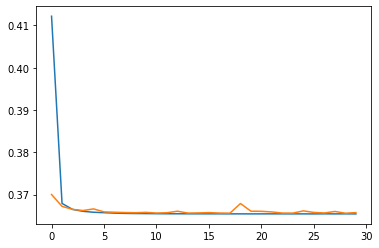

In [ ]:
#Plot loss
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.show()

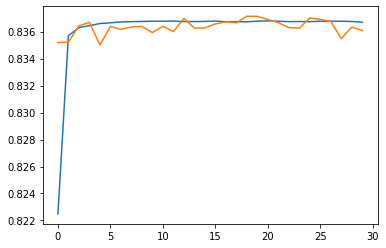

In [ ]:
#Plot Accuacy
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy'] 
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

In [ ]:
# Create the model and build layers
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,)))
model.add(layers.Dense(50,activation='relu'))  
model.add(layers.Dense(25, activation='sigmoid'))   


In [ ]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['mean_squared_error','accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_test,y_test), batch_size=128)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


38270/38282 [============================>.] - ETA: 0s - loss: 0.3173 - mean_squared_error: 0.4907 - accuracy: 0.8512

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


38282/38282 [==============================] - 145s 4ms/step - loss: 0.3173 - mean_squared_error: 0.4907 - accuracy: 0.8512 - val_loss: 0.3030 - val_mean_squared_error: 0.4870 - val_accuracy: 0.8577
Epoch 2/30
38282/38282 [==============================] - 141s 4ms/step - loss: 0.2983 - mean_squared_error: 0.4873 - accuracy: 0.8604 - val_loss: 0.2953 - val_mean_squared_error: 0.4867 - val_accuracy: 0.8620
Epoch 3/30
38282/38282 [==============================] - 140s 4ms/step - loss: 0.2940 - mean_squared_error: 0.4875 - accuracy: 0.8631 - val_loss: 0.2963 - val_mean_squared_error: 0.4866 - val_accuracy: 0.8619
Epoch 4/30
38282/38282 [==============================] - 141s 4ms/step - loss: 0.2918 - mean_squared_error: 0.4877 - accuracy: 0.8642 - val_loss: 0.2899 - val_mean_squared_error: 0.4872 - val_accuracy: 0.8656
Epoch 5/30
38282/38282 [==============================] - 141s 4ms/step - loss: 0.2904 - mean_squared_error: 0.4880 - accuracy: 0.8649 - val_loss: 0.2901 - val_mean_square

In [ ]:
#Plot loss
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.show()

In [ ]:
#Plot Accuacy
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy'] 
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

In [ ]:
# Create the model and build layers
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,)))
model.add(layers.Dense(64,activation='tanh'))  
model.add(layers.Dense(32, activation='relu'))   
model.add(layers.Dense(16, activation='linear'))  



In [ ]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['mean_squared_error','accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_test,y_test), batch_size=128)

In [ ]:
#Plot loss
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.show()

In [ ]:
#Plot Accuacy
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy'] 
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier